In [45]:
# import Libraries
import numpy as np
import pandas as pd

In [46]:
# import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [48]:
# import Linear Regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error

In [49]:
# import Decision Tree // Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [50]:
# import evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [51]:
adrar_df = pd.read_csv("../data/raw/data adrar.csv")
tata_df = pd.read_csv("../data/raw/data tataouine.csv")

In [52]:
adrar_df.columns

Index(['date', 'WS50M', 'T2M', 'PS', 'WS10M'], dtype='object')

In [53]:
adrar_df.shape

(70128, 5)

In [54]:
tata_df.columns

Index(['date', 'WS50M', 'T2M', 'PS', 'WS10M'], dtype='object')

In [55]:
tata_df.shape

(61343, 5)

In [56]:
combined_df = pd.concat([adrar_df, tata_df], axis=0, ignore_index=True)
combined_df.shape

(131471, 5)

In [57]:
combined_df.isna().sum()

date     0
WS50M    0
T2M      0
PS       0
WS10M    0
dtype: int64

In [58]:
combined_df.head(5)

,date,WS50M,T2M,PS,WS10M
0,01/01/2015 00:00,7.42,2.80,99.29,3.79
1,01/01/2015 01:00,7.06,2.24,99.29,3.63
2,01/01/2015 02:00,6.91,1.71,99.26,3.56
3,01/01/2015 03:00,7.03,1.24,99.23,3.57
4,01/01/2015 04:00,6.83,0.70,99.26,3.47


In [59]:
combined_df[['just_date', 'day_time']] = combined_df['date'].str.split(' ', expand=True)
combined_df.head(5)

,date,WS50M,T2M,PS,WS10M,just_date,day_time
0,01/01/2015 00:00,7.42,2.80,99.29,3.79,01/01/2015,00:00
1,01/01/2015 01:00,7.06,2.24,99.29,3.63,01/01/2015,01:00
2,01/01/2015 02:00,6.91,1.71,99.26,3.56,01/01/2015,02:00
3,01/01/2015 03:00,7.03,1.24,99.23,3.57,01/01/2015,03:00
4,01/01/2015 04:00,6.83,0.70,99.26,3.47,01/01/2015,04:00


In [60]:
# Convert the 'date' column to datetime format
combined_df['just_date'] = pd.to_datetime(combined_df['just_date'], format='%d/%m/%Y')

In [61]:
# Define a function to assign seasons based on the month
def get_season(date):
    month = date.month
    day = date.day

    if (month == 3 and day >= 1) or (month >= 4 and month <= 5):
        return 1
    elif (month == 6 and day >= 1) or (month >= 7 and month <= 8):
        return 2
    elif (month == 9 and day >= 1) or (month >= 10 and month <= 11):
        return 3
    else:
        return 4

# Create a new 'season' column
combined_df['season'] = combined_df['just_date'].apply(get_season)

In [62]:
combined_df['date'] = pd.to_datetime(combined_df['date'],format="%d/%m/%Y %H:%M")

In [63]:
# getting a numeric hour

combined_df['hour'] = combined_df['date'].dt.hour

In [64]:
# getting a numeric day of year (doy)

combined_df['doy'] = combined_df['date'].dt.dayofyear

Target & Features

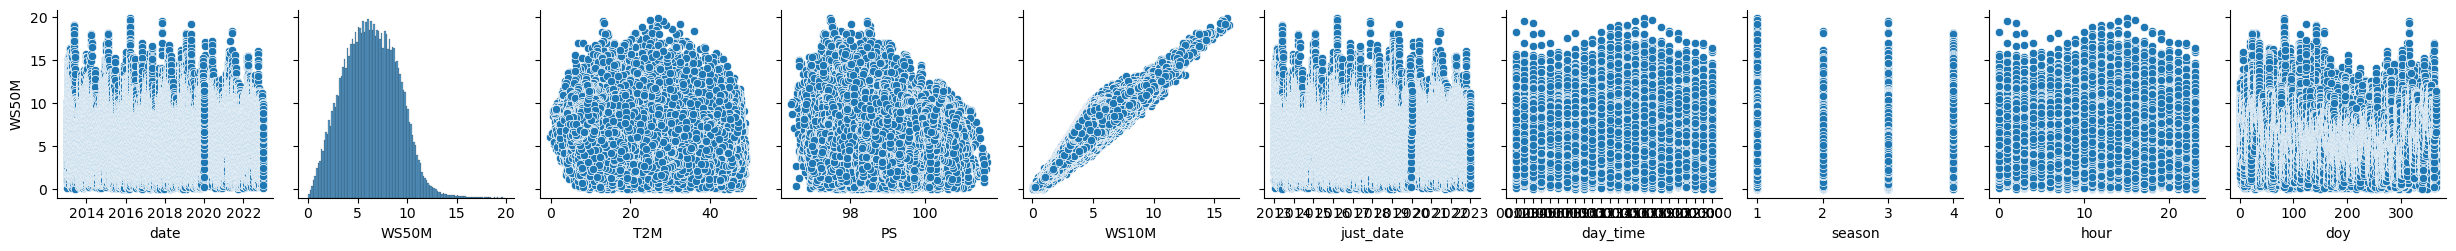

In [66]:
# checking to see the relationships b/w the target & features
sns.pairplot(combined_df, y_vars=['WS50M'], x_vars=combined_df.columns[:], kind='scatter');

Checking the distributions

<Axes: >

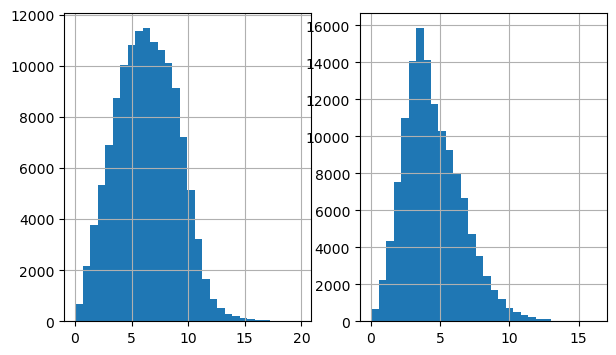

In [68]:
fig, axes = plt.subplots(1,2, figsize=(7,4))
combined_df['WS50M'].hist(bins=30,ax = axes[0])
combined_df['WS10M'].hist(bins=30,ax = axes[1])

<Axes: >

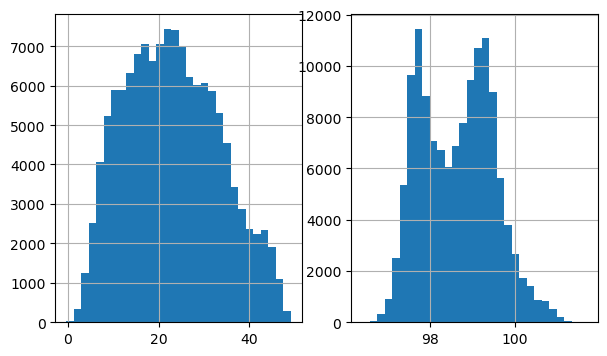

In [69]:
fig, axes = plt.subplots(1,2, figsize=(7,4))
combined_df['T2M'].hist(bins=30,ax = axes[0])
combined_df['PS'].hist(bins=30,ax = axes[1])

<Axes: >

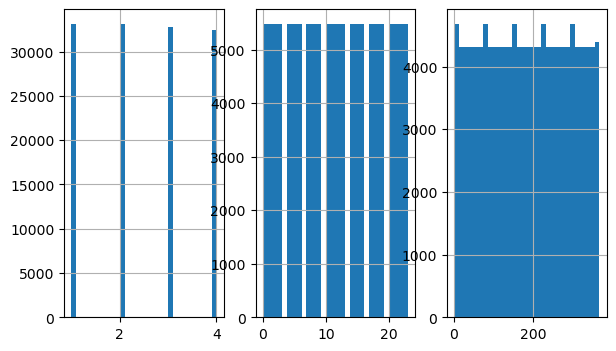

In [70]:
fig, axes = plt.subplots(1,3, figsize=(7,4))
combined_df['season'].hist(bins=30,ax = axes[0])
combined_df['hour'].hist(bins=30,ax = axes[1])
combined_df['doy'].hist(bins=30,ax = axes[2])

Dropping non-numeric columns

In [72]:
combined_df = combined_df.drop(columns=['date', 'just_date', 'day_time'])

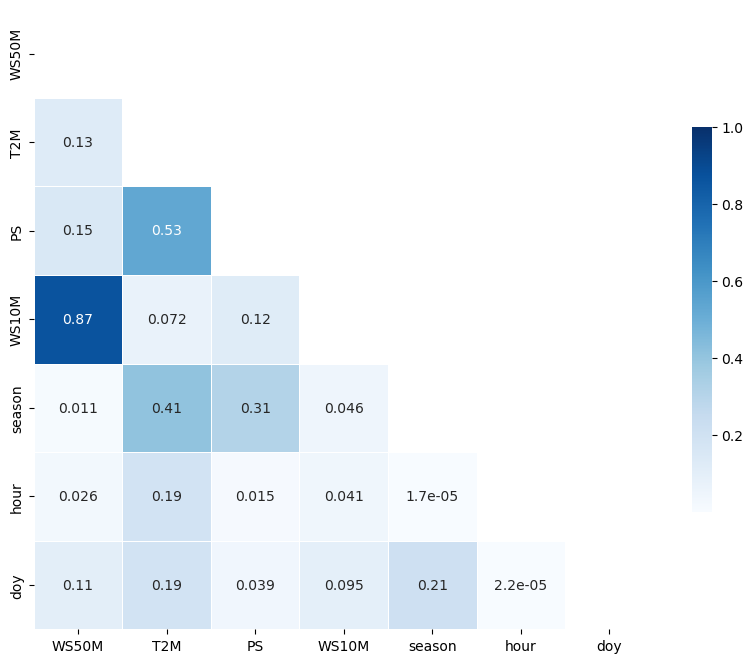

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate absolute correlation matrix
corr = np.abs(combined_df.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Use a blue color palette for the heatmap
cmap = sns.color_palette("Blues", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=corr, cmap=cmap)

# Show the plot
plt.show()

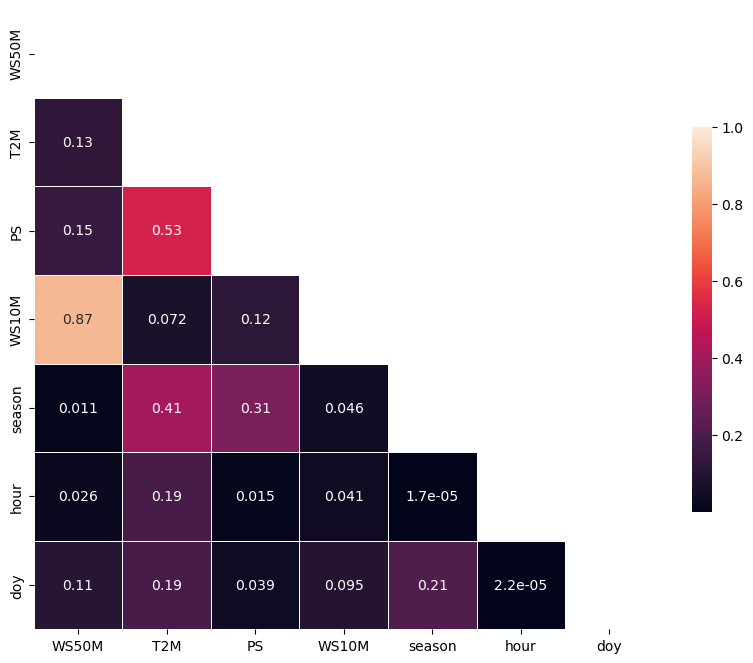

In [200]:
#features selection

corr=np.abs(combined_df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [74]:
combined_df.isna().sum()

WS50M     0
T2M       0
PS        0
WS10M     0
season    0
hour      0
doy       0
dtype: int64

In [75]:
# remember to re-run this cell if new features are added [!!!]

features = combined_df.drop(columns = ["WS50M"])
target = combined_df["WS50M"]

In [76]:
# getting the training & test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [77]:
X_train.isna().sum()

T2M       0
PS        0
WS10M     0
season    0
hour      0
doy       0
dtype: int64

In [78]:
# initialize scaler
scaler = StandardScaler()

In [79]:
# fit the model to the training data exclusively // transform X_train
X_train_norm = scaler.fit_transform(X_train)

In [80]:
# transform X_test
X_test_norm = scaler.transform(X_test)

In [81]:
#turning transformations arrays back into a dataframe object -> This is needed for random forest feature calculation [!!!]
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
#X_train_norm.head()

In [82]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
#X_test_norm.head()

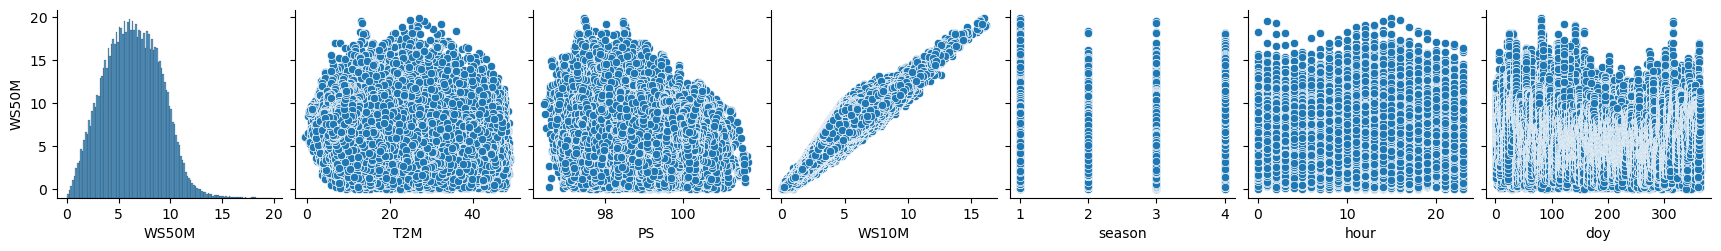

In [83]:
sns.pairplot(combined_df, y_vars=['WS50M'], x_vars=combined_df.columns[:], kind='scatter')

In [84]:
#LINEAR REGRESSION

In [85]:
X_train_norm.isna().sum()

T2M       0
PS        0
WS10M     0
season    0
hour      0
doy       0
dtype: int64

In [86]:
# creating & training the linear regression model
model = LinearRegression()
model.fit(X_train_norm, y_train)

LinearRegression()

In [128]:
# making predictions
y_pred = model.predict(X_test_norm)

In [174]:
# Step 1: Evaluate the model on training data
y_train_pred = model.predict(X_train_norm)

# Calculate performance metrics on training data
rmse_train = root_mean_squared_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Step 2: Evaluate the model on testing data
y_test_pred = model.predict(X_test_norm)

# Calculate performance metrics on testing data
rmse_test = root_mean_squared_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Step 3: Print the results
print("Training Set Metrics:")
print("Root Mean Squared Error (Train):", rmse_train)
print("MAPE (Train):", mape_train)
print("R² Score (Train):", r2_train)

print("\nTesting Set Metrics:")
print("Root Mean Squared Error (Test):", rmse_test)
print("MAPE (Test):", mape_test)
print("R² Score (Test):", r2_test)

Training Set Metrics:
Root Mean Squared Error (Train): 1.1478255720126835
MAPE (Train): 0.19515321416291767
R² Score (Train): 0.8189757551434385

Testing Set Metrics:
Root Mean Squared Error (Test): 1.1473962422368302
MAPE (Test): 0.20576642478464777
R² Score (Test): 0.8198998874640402


In [134]:
# printing the model's coefficients
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [-0.91303739 -0.59151959  2.33263815 -0.08385945  0.13753415  0.14935828]
Intercept: 6.35540484521184


In [136]:
X_train.columns

Index(['T2M', 'PS', 'WS10M', 'season', 'hour', 'doy'], dtype='object')

In [144]:
combined_df['WS50M'].describe()

count    131471.000000
mean          6.352793
std           2.698983
min           0.030000
25%           4.340000
50%           6.310000
75%           8.320000
max          19.830000
Name: WS50M, dtype: float64

<Axes: >

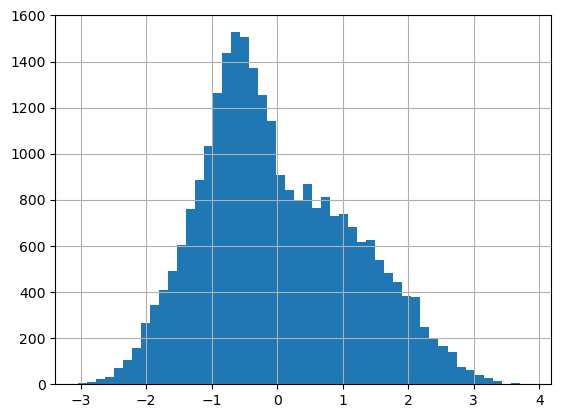

In [146]:
(y_test - y_pred).hist(bins=50)

<Axes: >

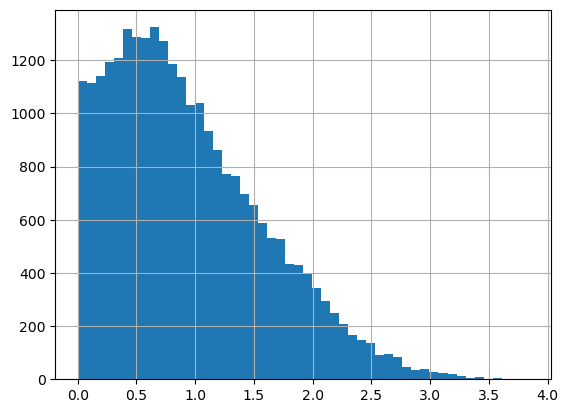

In [148]:
(y_test - y_pred).abs().hist(bins=50)

In [150]:
# from sklearn.metrics import mean_absolute_error
print(f"MAE {mean_absolute_error(y_pred, y_test): .2f}")

MAE  0.94


In [ ]:
#Random Forest

In [206]:
# initialize a random forest
forest = RandomForestRegressor(n_estimators=100, max_depth=20)

In [208]:
# train the model
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=20)

In [209]:
# making the predictions
pred = forest.predict(X_test_norm)

In [210]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# evaluate on training data
train_pred = forest.predict(X_train_norm)

# Training metrics
mae_train = mean_absolute_error(train_pred, y_train)
rmse_train = root_mean_squared_error(train_pred, y_train)
r2_train = forest.score(X_train_norm, y_train)

print("Training Set Metrics:")
print(f"MAE (Train): {mae_train:.2f}")
print(f"RMSE (Train): {rmse_train:.2f}")
print(f"R² Score (Train): {r2_train:.2f}")

# Testing metrics
mae_test = mean_absolute_error(pred, y_test)
rmse_test = root_mean_squared_error(pred, y_test)
r2_test = forest.score(X_test_norm, y_test)

print("\nTesting Set Metrics:")
print(f"MAE (Test): {mae_test:.2f}")
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"R² Score (Test): {r2_test:.2f}")

Training Set Metrics:
MAE (Train): 0.12
RMSE (Train): 0.17
R² Score (Train): 1.00

Testing Set Metrics:
MAE (Test): 0.27
RMSE (Test): 0.40
R² Score (Test): 0.98


In [166]:
# to calculate feature importance
rf_importance = {feature: importance for feature, importance in zip(X_train_norm.columns, forest.feature_importances_)}

In [168]:
for feature, importance in rf_importance.items():
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Feature: T2M, Importance: 0.0220
Feature: PS, Importance: 0.0150
Feature: WS10M, Importance: 0.8063
Feature: season, Importance: 0.0039
Feature: hour, Importance: 0.1414
Feature: doy, Importance: 0.0115
